## Import the wrapper and instantiate it with some untrained models

In [1]:
from analysis import ModelAnalysis
model_analysis = ModelAnalysis(
    models=ModelAnalysis.ALL_MODELS_UNTRAINED, 
    y='suicides_per_100k_pop')


## Train the models or load the pretrained stored models

In [2]:
# train the models
model_analysis.train()

## here we just load the pretrained ones
# model_analysis.load_models()

Fitting LinearRegression
Fitting DecisionTreeRegressor
Fitting MLPRegressor
Fitting XGBRegressor
Fitting RandomForestRegressor
Fitting KNeighborsRegressor


In [3]:
# make predictions for all trained models
# the results are stored in the model_analysis class
_ = model_analysis.predict(split='train')
_ = model_analysis.predict(split='val')
_ = model_analysis.predict(split='test')


## Evaluate the predictions using different metrics

In [4]:
# test other metrics
from sklearn.metrics import (max_error, mean_absolute_error,
                             mean_squared_error, median_absolute_error, r2_score)
from utils import root_mean_squared_error

for metric in [mean_squared_error, root_mean_squared_error, r2_score, mean_absolute_error]:
    print(f"{metric.__name__:#^32}")
    _ = model_analysis.evaluate(metric=metric, verbose=True)  # default split is test
    _ = model_analysis.evaluate(metric=metric, split='train', verbose=True)
    print()


#######mean_squared_error#######
LinearRegression: 148.38219135493515
DecisionTreeRegressor: 43.95350531400966
MLPRegressor: 13.044411085771682
XGBRegressor: 11.92088666247105
RandomForestRegressor: 19.2829865495652
KNeighborsRegressor: 81.38006206763286
LinearRegression: 202.7286567250663
DecisionTreeRegressor: 5.59931177047773e-36
MLPRegressor: 7.251343335588897
XGBRegressor: 0.5682294139288411
RandomForestRegressor: 3.2890853223985506
KNeighborsRegressor: 64.6836582047244

####root_mean_squared_error#####
LinearRegression: 12.181222900634204
DecisionTreeRegressor: 6.629743985555526
MLPRegressor: 3.611704734024043
XGBRegressor: 3.452663705383287
RandomForestRegressor: 4.391239750863667
KNeighborsRegressor: 9.021089849216272
LinearRegression: 14.238281382423452
DecisionTreeRegressor: 2.366286493744519e-18
MLPRegressor: 2.6928318431697322
XGBRegressor: 0.7538099322301618
RandomForestRegressor: 1.813583558151802
KNeighborsRegressor: 8.042615134688742

############r2_score############
Li

## Visualizations

### Visualize the predicitons

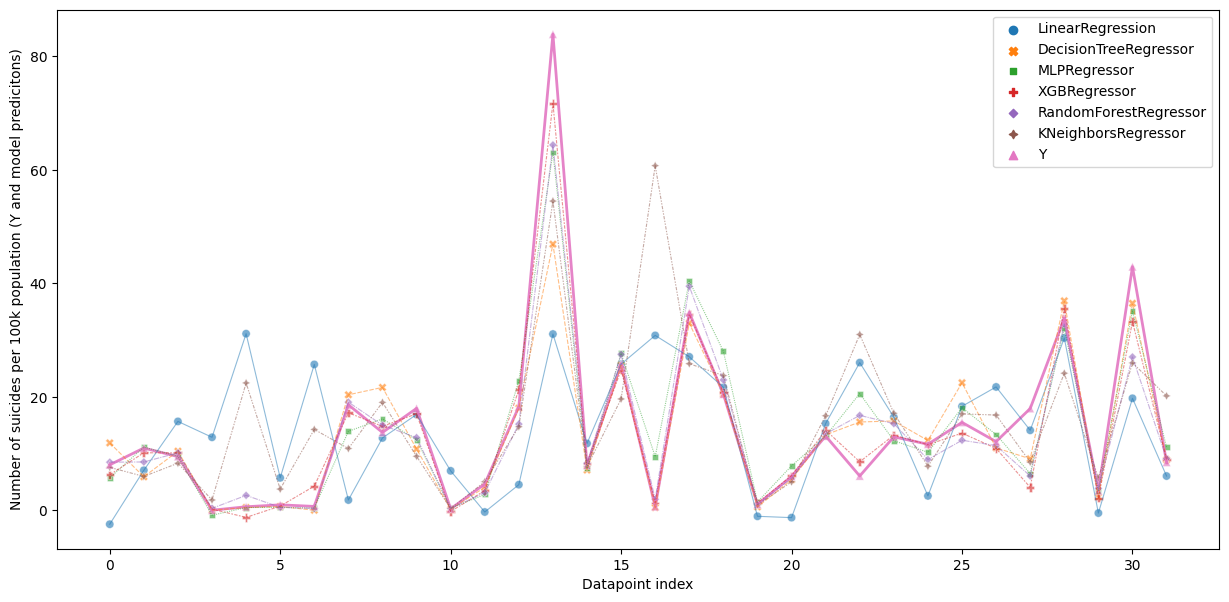

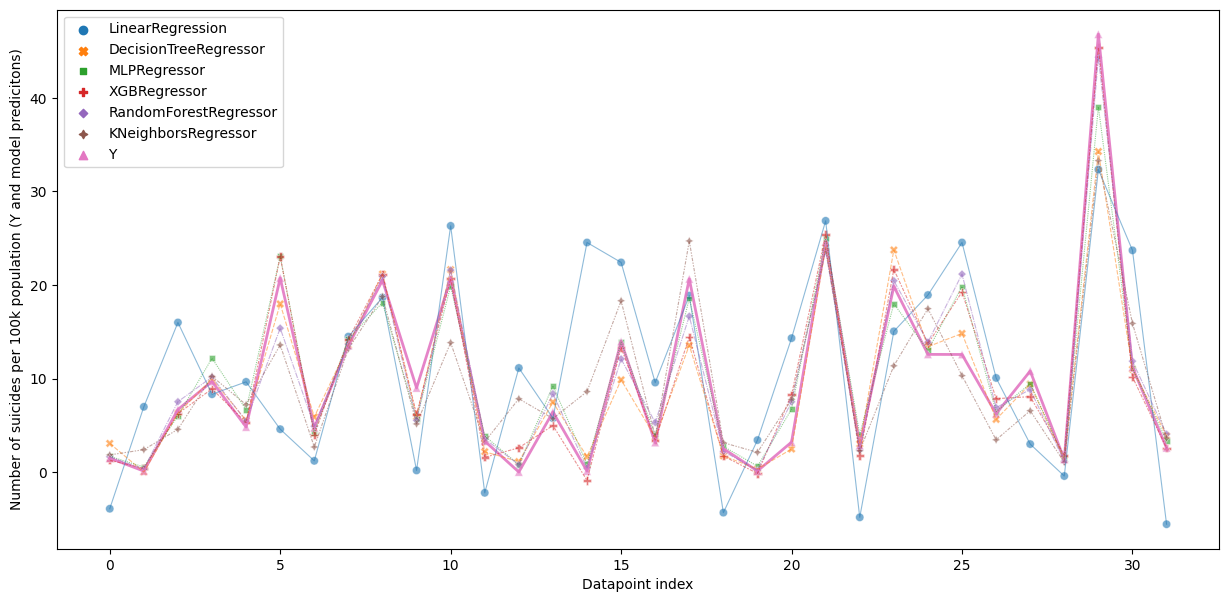

In [5]:
model_analysis.visualize_predictions(split="test")
model_analysis.visualize_predictions(sample_range=(100,132), split='test')

### Visualize the accuracies based on different metrics

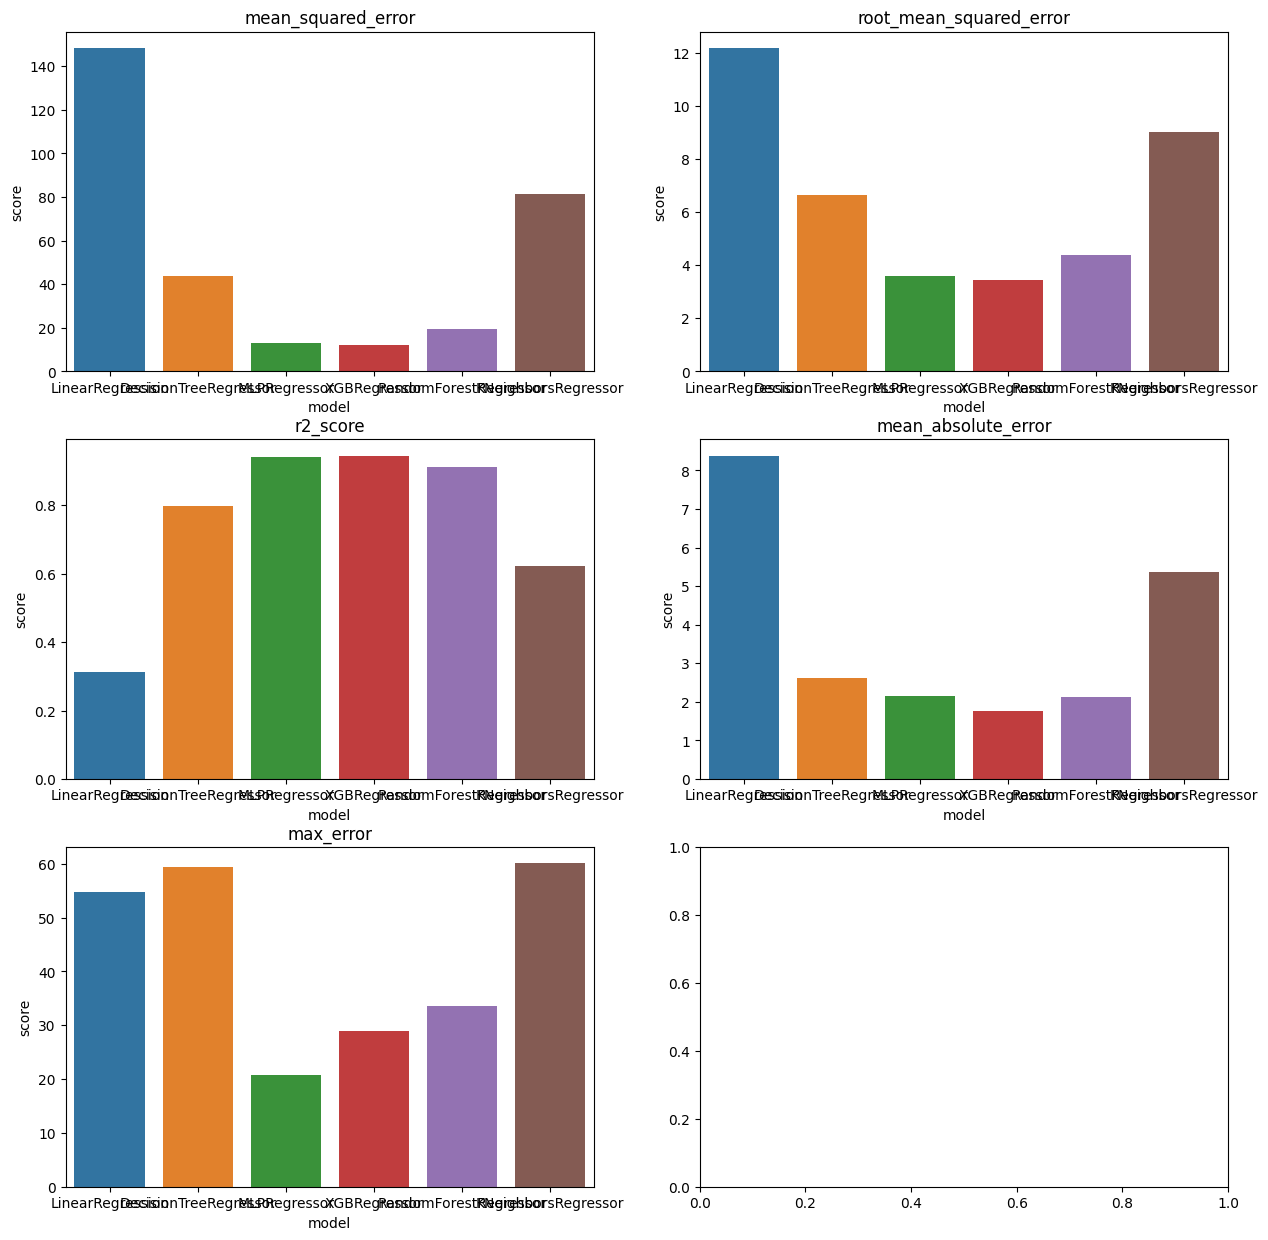

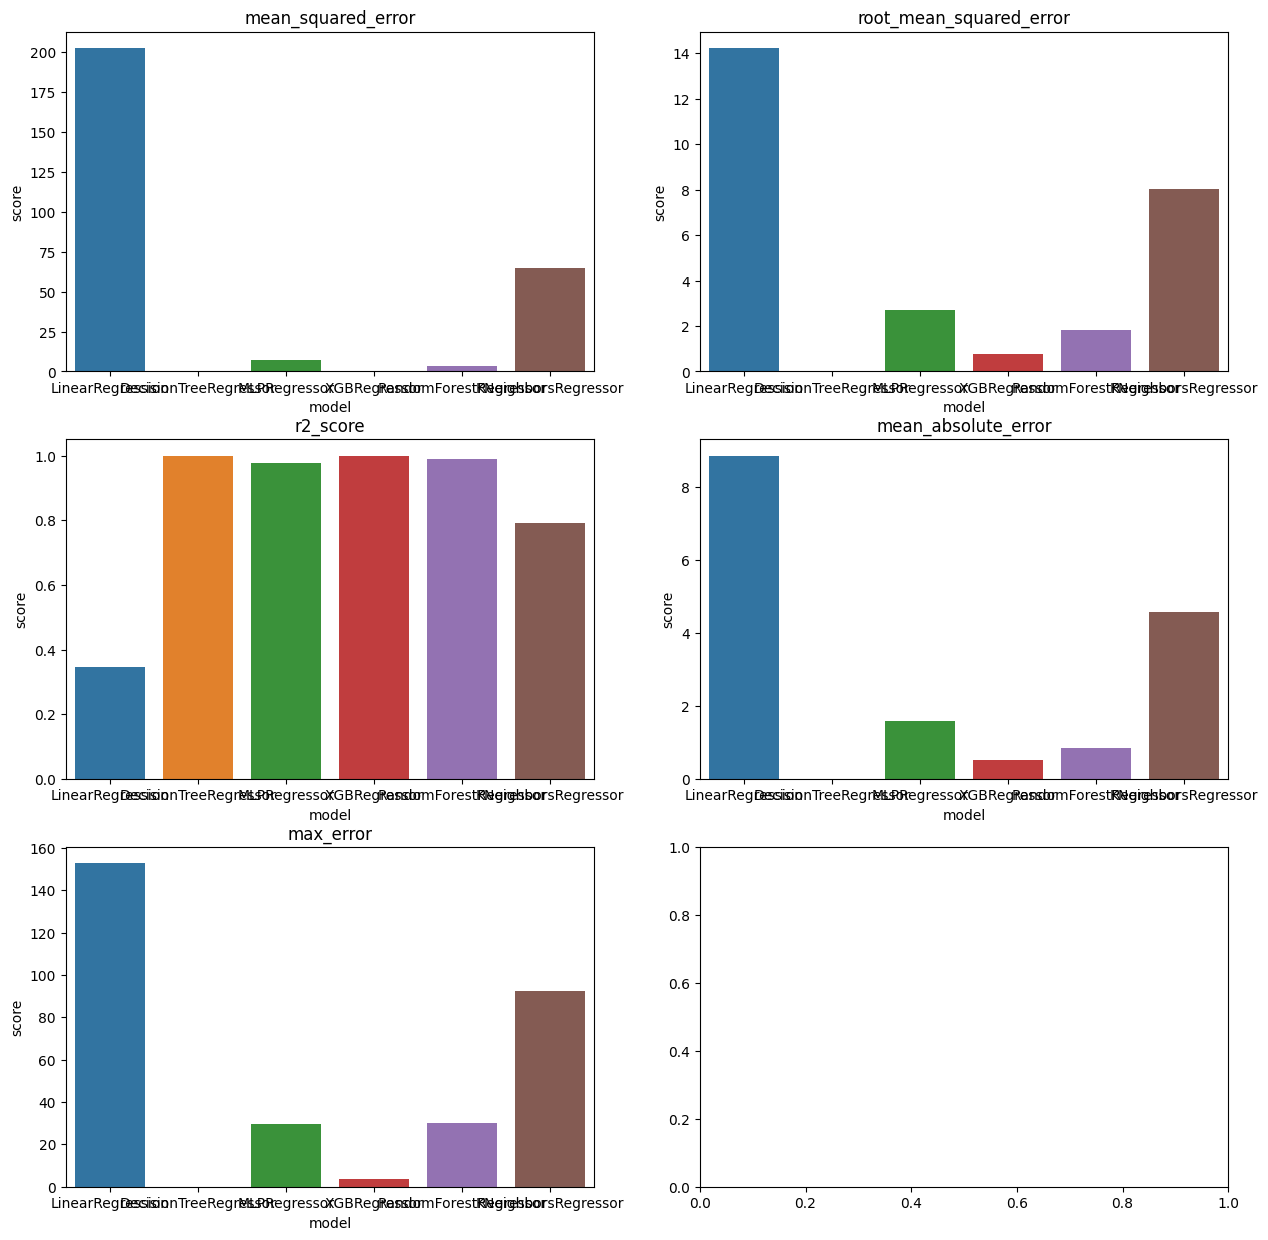

In [6]:
model_analysis.visualize_metrics(split='test')
model_analysis.visualize_metrics(split='train')

## We can save the models to a file to reuse them later without having to retrain them

In [7]:
model_analysis.save_models()